# Preamble

## Imports

Standard imports

In [4]:
import sys, os, re, time, copy
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import unidecode

Language libraries:

In [5]:
from textblob import TextBlob

### Settings

Disable copy warnings in Pandas

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

Disable depreciation warnings

In [7]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

-----
# Step 1: Inspect the data
-----

## Load the data

You can also download the Excel sheet directly by clicking here: [download](https://github.com/TiesdeKok/MAS_2022_textual_analysis/raw/main/facebook_review_dataset.xlsx)

In [8]:
review_df = pd.read_excel('facebook_review_dataset.xlsx')

## Inspect the data

### Dataset

In [41]:
print(f"The dataset contains {len(review_df)} reviews. \nThe oldest review is from {review_df['date'].min()} \nThe newest review is from {review_df['date'].max()}.")
review_df.head(2).T

The dataset contains 2290 reviews. 
The oldest review is from 2014-03-17 00:00:00 
The newest review is from 2021-12-28 00:00:00.


,0,1
date,2021-11-09 00:00:00,2021-12-25 00:00:00
year,2021,2021
rating,5,5
rating_wlb,5,5
rating_culture,5,5
rating_dei,5,4
rating_comp,5,4
job_title,Software Engineer,Data Scientist
location,"Seattle, WA","San Francisco, CA"
pros,"I’m still a bit new, but I have very good impr...","Its all you hear about, fun and diverse and su..."


### Number of reviews by year

In [42]:
review_df.value_counts('year').sort_index(ascending=False)

year
2021    1123
2020     572
2019     226
2018     239
2017     128
2016       1
2014       1
dtype: int64

------
------
## Task 1: Evaluate the textual data that we are working with. 

Things to evaluate:

- What types of constructs could you generate based on the reviews? 

### Show random review

**Note:** Every time you run the code below it will show a different review in the dataset.

In [43]:
#############################
## Run this cell to evaluate!
############################# 

review_row = review_df.sample(1).iloc[0].to_dict()
print(f"Review by a {review_row['job_title']} in {review_row['location']} on {review_row['date']}")
print(f"\nPros: \n\n{review_row['pros'].strip()}")
print(f"\nCons: \n\n{review_row['cons'].strip()}")

Review by a Client Partner in Miami, FL on 2021-11-01 00:00:00

Pros: 

Autonomy, impact, product, innovation. Ability to manage your time and grow your career.

Cons: 

Fast moving environment, not suited for all.


## 

------
------


# Step 2: Clean the data
-----

### Cleaning function

In [12]:
def clean_text(input_str):
    clean_str = copy.copy(input_str)

    ## Remove special characters
    clean_str = unidecode.unidecode(clean_str)

    ## Remove any non-letter characters except for regular sentence-ending punctuation
    clean_str = re.sub(r'[^a-zA-Z\s\.!\?\\n]', '', clean_str)

    ## Replace all \s with a single space except for \n
    clean_str = re.sub(r'[ \t\x0B\f\r]+', ' ', clean_str)

    ## Replace a newline with a dot and a space
    clean_str = re.sub(r'\s*\n\s*', '. ', clean_str)

    ## Replace duplicate dots
    clean_str = re.sub(r'\.+', '.', clean_str)

    ## Remove any leading or trailing spaces
    clean_str = clean_str.strip()

    ## Add trailing dot if not exists
    if clean_str[-1] != '.':
        clean_str += '.'

    return clean_str

### Run

In [13]:
review_df['pros_clean'] = review_df['pros'].apply(clean_text)
review_df['cons_clean'] = review_df['cons'].apply(clean_text)

#### Add lower case version

In [14]:
review_df['pros_clean_l'] = review_df['pros_clean'].str.lower()
review_df['cons_clean_l'] = review_df['cons_clean'].str.lower()

------
------
## Task 2: Evaluate whether we did a good job cleaning the data

Things to evaluate:

- Compare the "dirty" versus the "clean" text (see below), what are the types of things that are different?
- Can you find any remaining errors that aren't taken care off, should we deal with these?

### Inspect

In [15]:
#############################
## Run this cell to evaluate!
############################# 

review_row = review_df.sample(1).iloc[0].to_dict()
print(f"Review by a {review_row['job_title']} in {review_row['location']} on {review_row['date']}")
print(f"\nPros: \n\n{review_row['pros'].strip()}")
print(f"\nPros clean: \n\n{review_row['pros_clean'].strip()}")
print('\n' + '-'*50)
print(f"\nCons: \n\n{review_row['cons'].strip()}")
print(f"\nCons clean: \n\n{review_row['cons_clean'].strip()}")

Review by a Production Engineer in Menlo Park, CA on 2021-06-18 00:00:00

Pros: 

The salary is excellent and engineering decisions aren't made from on high.

Pros clean: 

The salary is excellent and engineering decisions arent made from on high.

--------------------------------------------------

Cons: 

Each day employees are waterboarded with wokeness. The focus of the company now seems to be social engineering and activism.

From an engineering perspective there is a not-invented-here-syndrome almost as bad as RedHat. There are many third rails that may not be touched.

Cons clean: 

Each day employees are waterboarded with wokeness. The focus of the company now seems to be social engineering and activism. From an engineering perspective there is a notinventedheresyndrome almost as bad as RedHat. There are many third rails that may not be touched.


------
------
# Step 3: Analyze the data


------
------
## Task 3: Let's perform a keyword analysis!

Things to evaluate:

- Use the provided keywords to see what we can learn about the reviews.
- Can you come up with keywords of your own to obtain additional insights?

### Check whether each pros and cons contains a keyword

In [16]:
keywords_of_interest = ['traffic', 'culture', 'salary', 'diversity', 'balance'] ## <-- Change this!

text_types = ['pros', 'cons']
contains_columns = []
for text_type in text_types:
    for keyword in keywords_of_interest:
        review_df[f'{text_type}_contains_{keyword}'] = review_df[f'{text_type}_clean_l'].str.contains(keyword)**1
        contains_columns.append(f'{text_type}_contains_{keyword}')

In [17]:
review_df.sample(2).T

,421,1781
date,2021-07-12 00:00:00,2019-08-11 00:00:00
year,2021,2019
rating,4,5
rating_wlb,0,4
rating_culture,0,5
rating_dei,0,0
rating_comp,0,5
job_title,Product Manager,Software Engineer
location,"Menlo Park, CA","Seattle, WA"
pros,"Autonomy, culture, speed of decisions, opportu...","The benefits, perks, and opportunities for gro..."


### Create aggregate dataframe

In [18]:
review_kw_df = review_df[contains_columns].sum().reset_index().rename(columns={'index' : 'group', 0 : 'count'})
tmp_df = review_kw_df['group'].str.split('_', expand=True).rename(columns={0 : 'text_type', 2 : 'keyword'}).drop(1,axis=1)
review_kw_df = pd.concat([review_kw_df, tmp_df], axis=1)
review_kw_df = review_kw_df[['keyword', 'text_type', 'count']].sort_values(by='keyword', ascending=False)

In [19]:
review_kw_df

,keyword,text_type,count
0,traffic,pros,0
5,traffic,cons,9
2,salary,pros,125
7,salary,cons,12
3,diversity,pros,34
8,diversity,cons,28
1,culture,pros,407
6,culture,cons,155
4,balance,pros,118
9,balance,cons,279


## Sentiment analysis

### Add the sentiment to the dataframe

In [20]:
def add_sentiment(input_str):
    return TextBlob(input_str).sentiment.polarity

In [21]:
review_df['pros_sentiment'] = review_df['pros_clean'].apply(add_sentiment)
review_df['cons_sentiment'] = review_df['cons_clean'].apply(add_sentiment)
review_df['average_sentiment'] = (review_df['pros_sentiment'] + review_df['cons_sentiment'])/2

------
------
## Task 4: Inspect the sentiment scores, are they reasonable?

Things to evaluate:

- Use the inspection tools below to evaluate whether the sentiment scores work as expected. Can you find any issues?

### Inspect

In [22]:
review_row = review_df.sample(1).iloc[0].to_dict()
print(f"Review by a {review_row['job_title']} in {review_row['location']} on {review_row['date']}")
print(f"\nPros clean (sentiment: {review_row['pros_sentiment']:.2f}): \n\n{review_row['pros_clean'].strip()}")
print('\n' + '-'*50)
print(f"\nCons clean (sentiment: {review_row['cons_sentiment']:.2f}): \n\n{review_row['cons_clean'].strip()}")

Review by a Software Engineer in New York, NY on 2020-10-21 00:00:00

Pros clean (sentiment: 0.70): 

Good pay and good benefits.

--------------------------------------------------

Cons clean (sentiment: 0.00): 

If you dont believe in their values then this company is not for you.


### Show summary statistics for the sentiment

In [23]:
review_df[['pros_sentiment', 'cons_sentiment']].describe()

,pros_sentiment,cons_sentiment
count,2290.000000,2290.000000
mean,0.429227,0.046158
std,0.280898,0.279836
min,-1.000000,-1.000000
25%,0.228921,-0.050000
50%,0.450000,0.000000
75%,0.650000,0.200000
max,1.000000,1.000000


### Show examples of high and low sentiment reviews

In [24]:
top_pos_df = review_df.sort_values(by=['pros_sentiment', 'cons_sentiment'], ascending=False).head(20)
top_neg_df = review_df.sort_values(by=['pros_sentiment', 'cons_sentiment'], ascending=True).head(20)

In [25]:
review_row = top_pos_df.sample(1).iloc[0].to_dict()
print(f"Very positive review by a {review_row['job_title']} in {review_row['location']} on {review_row['date']}")
print(f"\nPros clean (sentiment: {review_row['pros_sentiment']:.2f}): \n\n{review_row['pros_clean'].strip()}")
print('\n' + '-'*50)
print(f"\nCons clean (sentiment: {review_row['cons_sentiment']:.2f}): \n\n{review_row['cons_clean'].strip()}")

Very positive review by a Software Engineer in San Jose, CA on 2021-03-10 00:00:00

Pros clean (sentiment: 1.00): 

Best make tons of money.

--------------------------------------------------

Cons clean (sentiment: 0.80): 

Nothing im happy about everything great company.


In [26]:
review_row = top_neg_df.sample(1).iloc[0].to_dict()
print(f"Very negative review by a {review_row['job_title']} in {review_row['location']} on {review_row['date']}")
print(f"\nPros clean (sentiment: {review_row['pros_sentiment']:.2f}): \n\n{review_row['pros_clean'].strip()}")
print('\n' + '-'*50)
print(f"\nCons clean (sentiment: {review_row['cons_sentiment']:.2f}): \n\n{review_row['cons_clean'].strip()}")

Very negative review by a Software Engineer in Menlo Park, CA on 2021-02-09 00:00:00

Pros clean (sentiment: -0.12): 

Openness which means you can see and submit diffs on almost everyones code and you can see the direction and accomplishments of other teams.

--------------------------------------------------

Cons clean (sentiment: 0.07): 

Move fast break things applies to internal tools and infrastructure. Things broke often enough that I remember it as an annoyance.


### Did the sentiment change over time?

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
## Retina
sns.set(style="whitegrid", font_scale=1.2)

In [28]:
graph_df = review_df[review_df.year >= 2017]

#### Pros

Text(0, 0.5, 'Sentiment')

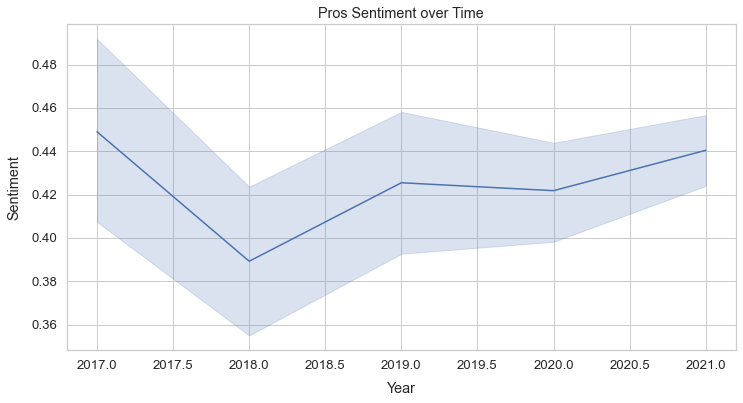

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(y='pros_sentiment', x='year', data=graph_df)

## make pretty
plt.title('Pros Sentiment over Time')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Sentiment', labelpad=10)

#### Cons

Text(0, 0.5, 'Sentiment')

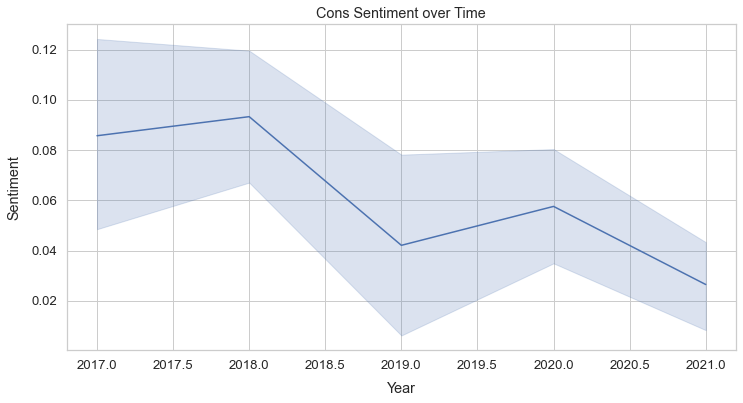

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(y='cons_sentiment', x='year', data=graph_df)

## make pretty
plt.title('Cons Sentiment over Time')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Sentiment', labelpad=10)

### Does the average yearly sentiment and the average yearly ratings change similarly over time?

#### Text sentiment

Text(0, 0.5, 'Sentiment')

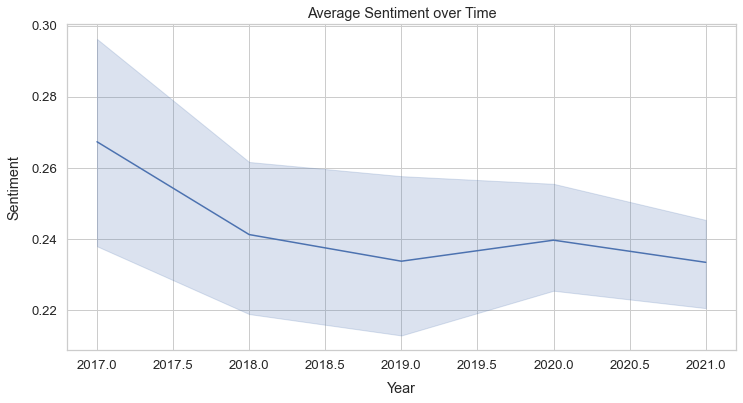

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(y='average_sentiment', x='year', data=graph_df)

## make pretty
plt.title('Average Sentiment over Time')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Sentiment', labelpad=10)

### Rating sentiment

Text(0, 0.5, 'Rating')

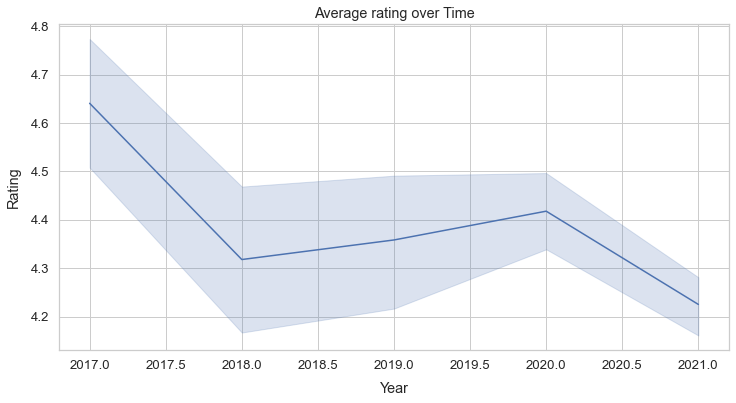

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(y='rating', x='year', data=graph_df)

## make pretty
plt.title('Average rating over Time')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Rating', labelpad=10)

--------
# Advanced - LDA model
-------

## Prep the data

In [33]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
clean_pros_l = review_df['pros_clean_l'].tolist()
clean_cons_l = review_df['cons_clean_l'].tolist()

In [35]:
vec_pros = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
tf_pros = vec_pros.fit_transform(clean_pros_l)

vec_cons = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
tf_cons = vec_cons.fit_transform(clean_cons_l)

## Train the models

#### Pros

In [36]:
n_topics = 6 ## <-- Change this!
lda_pros = LatentDirichletAllocation(n_components=n_topics, max_iter=10,
                                learning_method='online',
                                n_jobs=1)
lda_f_pros = lda_pros.fit_transform(tf_pros)

#### Cons

In [37]:
n_topics = 6 ## <-- Change this!
lda_cons = LatentDirichletAllocation(n_components=n_topics, max_iter=10,
                                learning_method='online',
                                n_jobs=1)
lda_f_cons = lda_cons.fit_transform(tf_cons)

## Visualize

In [38]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

## Task 5: LDA Analysis, do the clusters make sense? 

Things to evaluate:

- Use the inspection tools below to evaluate whether the LD&A clusters make sense. Can you interpret what the different clusters represent?
- Play around with the `n_topics` parameter to see how the results change.

### Pros

In [39]:
pyLDAvis.sklearn.prepare(lda_pros, tf_pros, vec_pros, n_jobs=1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.201644 -0.011104       1        1  26.204989
1     -0.193817  0.019699       2        1  21.990177
3      0.155844  0.225263       3        1  18.889476
2     -0.118836 -0.000812       4        1  15.430174
5      0.144268 -0.233009       5        1  14.767001
0      0.214184 -0.000036       6        1   2.718182, topic_info=            Term        Freq       Total Category  logprob  loglift
1718          xd  597.000000  597.000000  Default  30.0000  30.0000
658         good  575.000000  575.000000  Default  29.0000  29.0000
1105      people  552.000000  552.000000  Default  28.0000  28.0000
609         food  223.000000  223.000000  Default  27.0000  27.0000
667        great  802.000000  802.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
432          dry    5.213458    7.541568   Topic6  -4.8445   3.2360
655         goes    5.906193   14.972858   Topic6  -4.7197   2.6750
355       decent    6.067866   17.579516   Topic6  -4.6927   2.5415
1525  technology    6.480188   21.399075   Topic6  -4.6270   2.4106
1480  successful    4.335027   10.528970   Topic6  -5.0290   2.7178

[348 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6         2  0.057624   access
6         5  0.921977   access
44        1  0.417208  amazing
44        2  0.386304  amazing
44        4  0.195727  amazing
...     ...       ...      ...
1723      5  0.778692    years
1727      2  0.016707    youre
1727      3  0.534629    youre
1727      4  0.417679    youre
1727      5  0.016707    youre

[455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 6, 1])

### Cons

In [40]:
pyLDAvis.sklearn.prepare(lda_cons, tf_cons, vec_cons, n_jobs=1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051584 -0.140259       1        1  27.950974
0      0.226489  0.059178       2        1  27.435136
2      0.112518  0.139331       3        1  16.709860
3     -0.065531 -0.118947       4        1  11.601677
4     -0.102958 -0.135629       5        1   8.951040
5     -0.222101  0.196326       6        1   7.351313, topic_info=         Term        Freq       Total Category  logprob  loglift
2072     work  561.000000  561.000000  Default  30.0000  30.0000
126   balance  249.000000  249.000000  Default  29.0000  29.0000
1068      lot  152.000000  152.000000  Default  28.0000  28.0000
324      cons   94.000000   94.000000  Default  27.0000  27.0000
1032     life  185.000000  185.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
764     great   16.836601   91.636799   Topic6  -4.5453   0.9160
123       bad   14.904888  136.105012   Topic6  -4.6672   0.3986
1195     need   12.573934   83.748098   Topic6  -4.8372   0.7141
1881   things    9.771058   99.816280   Topic6  -5.0894   0.2864
879    impact    8.929378   96.069429   Topic6  -5.1795   0.2346

[346 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         4  0.961681     able
51        5  0.902687      ago
54        5  0.953158    align
61        6  0.901061  amazing
67        2  0.930670      amp
...     ...       ...      ...
2093      2  0.591092       xd
2093      3  0.012213       xd
2093      4  0.031753       xd
2093      6  0.002443       xd
2104      1  0.988116    youre

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5, 6])